In [1]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import matplotlib.pyplot  as plt
from matplotlib import cm
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('dataset/df.csv')
area = pd.read_csv('dataset/area.csv')

In [3]:
df_x = df.drop(['Unnamed: 0', '상권_코드_명'], axis=1)
df_y = df['상권_코드_명']

### K-means

In [4]:
kmeans = KMeans(n_clusters=3, max_iter=500)

cluster = kmeans.fit_transform(df_x)
centers_df = kmeans.cluster_centers_

display(centers_df, kmeans.labels_)

array([[ 1.60574949e+00,  2.24024641e+00,  1.66324435e-01,
         7.78234086e-01,  2.60369610e+00,  3.71663244e-01,
         2.66940452e-02,  3.57289528e-01,  2.05338809e-03,
         6.52977413e-01,  4.10677618e-03,  0.00000000e+00,
         6.16016427e-03,  6.85831622e-01,  1.89527721e+00],
       [ 1.41000000e+00,  6.34000000e-01,  7.00000000e-02,
         2.34000000e-01,  1.88600000e+00,  6.76000000e-01,
         4.00000000e-03,  2.50000000e-01,  2.00000000e-03,
         3.12000000e-01,  2.00000000e-03,  0.00000000e+00,
         0.00000000e+00,  4.04000000e-01,  2.17200000e+00],
       [ 1.73277662e-01,  3.79958246e-01,  1.25260960e-02,
         9.81210856e-02,  4.44676409e-01,  6.26304802e-02,
         1.04384134e-02,  1.73277662e-01, -8.67361738e-19,
         1.48225470e-01,  4.17536534e-03,  0.00000000e+00,
         4.33680869e-19,  1.48225470e-01,  2.56784969e-01]])

array([1, 1, 2, ..., 0, 1, 2])

c:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


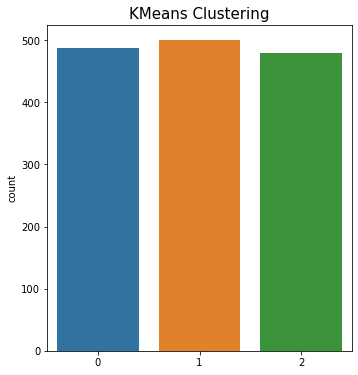

In [5]:
plt.figure(figsize=(12, 6))

# 군집별로 어떻게 분류했는가를 시각화
plt.subplot(1,2,1)
sns.countplot(kmeans.labels_)
plt.title("KMeans Clustering", fontsize=15)

plt.show()

### DBSCAN

In [6]:
dbscan = DBSCAN(eps=0.5, min_samples=1)

dbscan_data = dbscan.fit_predict(df_x)
dbscan_data

array([  0,   1,   2, ..., 949, 950,   2], dtype=int64)

### 평가

In [7]:
from sklearn.metrics import silhouette_score, silhouette_samples

In [8]:
score = silhouette_score(df_x, kmeans.labels_)
score2 = silhouette_score(df_x, dbscan_data)
display(score, score2)

0.23908686165124715

0.465893587994543

In [9]:
samples = silhouette_samples(df_x, kmeans.labels_)
samples2 = silhouette_samples(df_x, dbscan_data)
display(samples, samples2)

array([-0.1230325 , -0.03245625,  0.68382812, ...,  0.05169874,
        0.08222989,  0.68382812])

array([0., 1., 1., ..., 0., 0., 1.])

### num_cluster, eps 변화에 따른 score

In [86]:
def plot_silhouette(X, num_cluesters, epss, min_samples):
    for n_clusters, eps, min_sample in zip(num_cluesters, epss, min_samples):
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    
        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)
    
        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)
    
        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)
    
        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]
    
            ith_cluster_silhouette_values.sort()
    
            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i
    
            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)
    
            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    
            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples
    
        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")
    
        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    
        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        
        #----------------------------------------------------------
        
        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax2.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax2.set_ylim([0, len(X) + (eps + 1) * 10])
    
        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = DBSCAN(eps=eps, min_samples=min_sample)
        cluster_labels = clusterer.fit_predict(X)
    
        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For eps =", eps, "The average silhouette_score is :", silhouette_avg)
    
        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)
    
        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]
    
            ith_cluster_silhouette_values.sort()
    
            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i
    
            color = cm.nipy_spectral(float(i) / float(eps))
            ax2.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)
    
            # Label the silhouette plots with their cluster numbers at the middle
            ax2.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    
            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples
    
        ax2.set_title("The silhouette plot for the various clusters.")
        ax2.set_xlabel("The silhouette coefficient values")
        ax2.set_ylabel("Cluster label")
    
        # The vertical line for average silhouette score of all the values
        ax2.axvline(x=silhouette_avg, color="red", linestyle="--")
    
        ax2.set_yticks([])  # Clear the yaxis labels / ticks
        ax2.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    
        # 2nd Plot showing the actual clusters formed
        # colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        
        # ax2.scatter(X.iloc[:, 0], X.iloc[:, 1]#, X.iloc[:, 2], X.iloc[:, 3], X.iloc[:, 4], X.iloc[:, 5], X.iloc[:, 6], X.iloc[:, 7],
        #             # X.iloc[:, 8], X.iloc[:, 9], X.iloc[:, 10], X.iloc[:, 11], X.iloc[:, 12], X.iloc[:, 13], X.iloc[:, 14]
        #             , marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k'
        #             )
    
        # # Labeling the clusters
        # centers = clusterer.cluster_centers_
        # # Draw white circles at cluster centers
        # ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
        #             c="white", alpha=1, s=200, edgecolor='k')
    
        # for i, c in enumerate(centers):
        #     ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
        #                 s=50, edgecolor='k')
    
        # ax2.set_title("The visualization of the clustered data.")
        # ax2.set_xlabel("Feature space for the 1st feature")
        # ax2.set_ylabel("Feature space for the 2nd feature")
    
        plt.suptitle(("Silhouette analysis for KMeans / DBSCAN clustering on sample data "
                      f'with n_clusters = {n_clusters} with eps = {eps} with min_samples = {min_sample}'),
                     fontsize=14, fontweight='bold')
    
        plt.show() 

In [37]:
df_x.shape
len(df_x)

1466

For n_clusters = 2 The average silhouette_score is : 0.2879691707828513
For eps = 0.1 The average silhouette_score is : -0.08847612852364398


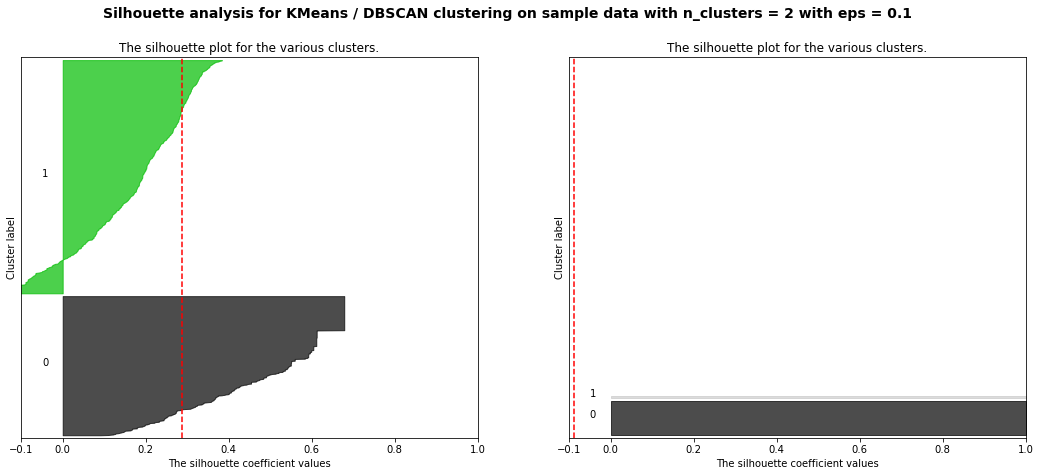

For n_clusters = 3 The average silhouette_score is : 0.28423629976737586
For eps = 0.3 The average silhouette_score is : -0.08847612852364398


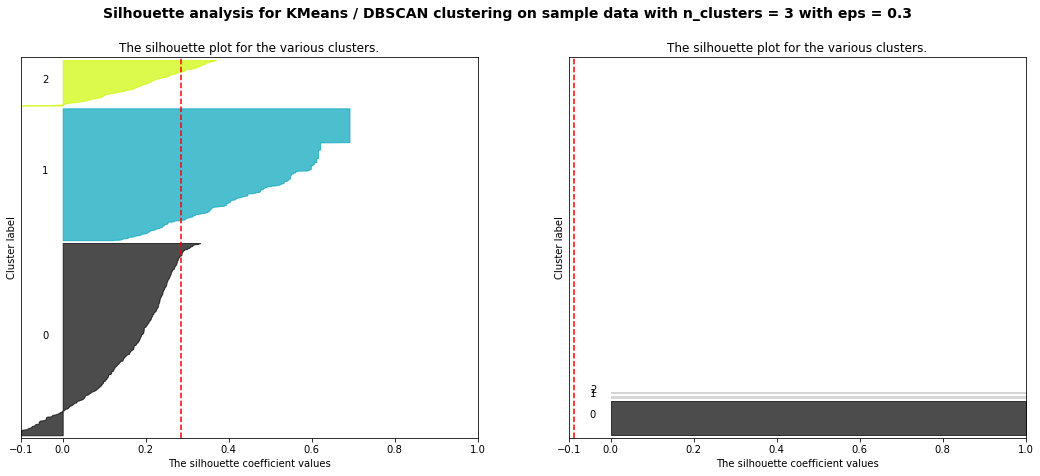

For n_clusters = 4 The average silhouette_score is : 0.2608807851902431
For eps = 0.5 The average silhouette_score is : -0.08847612852364398


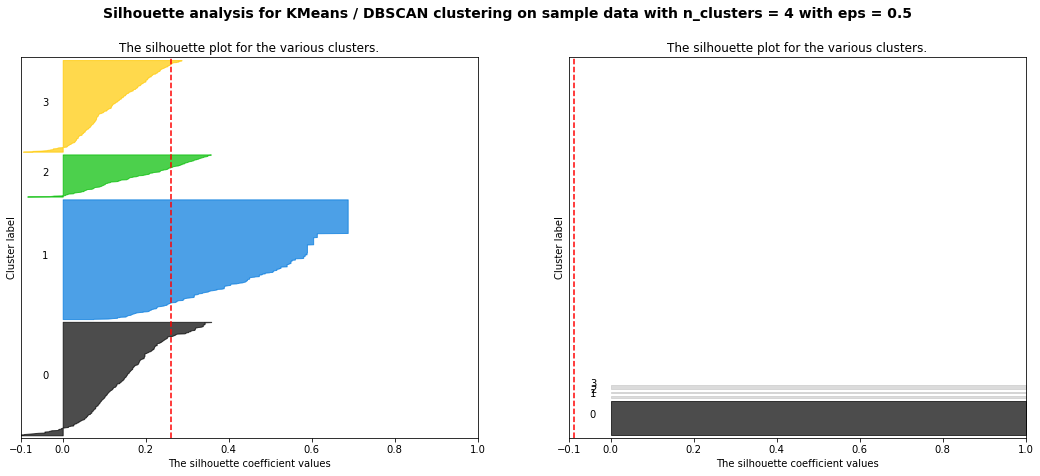

For n_clusters = 5 The average silhouette_score is : 0.26586599791362114
For eps = 0.6 The average silhouette_score is : -0.08847612852364398


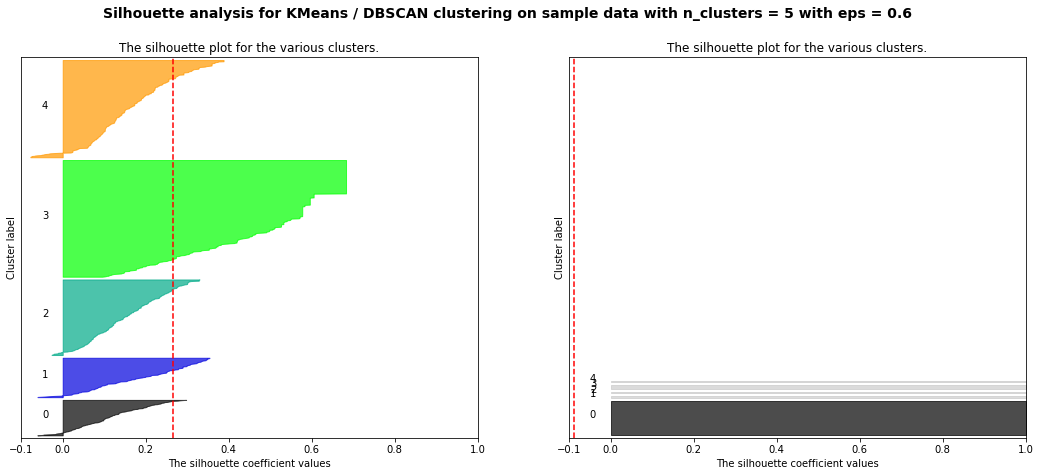

For n_clusters = 6 The average silhouette_score is : 0.22485151805392736
For eps = 0.7 The average silhouette_score is : -0.08847612852364398


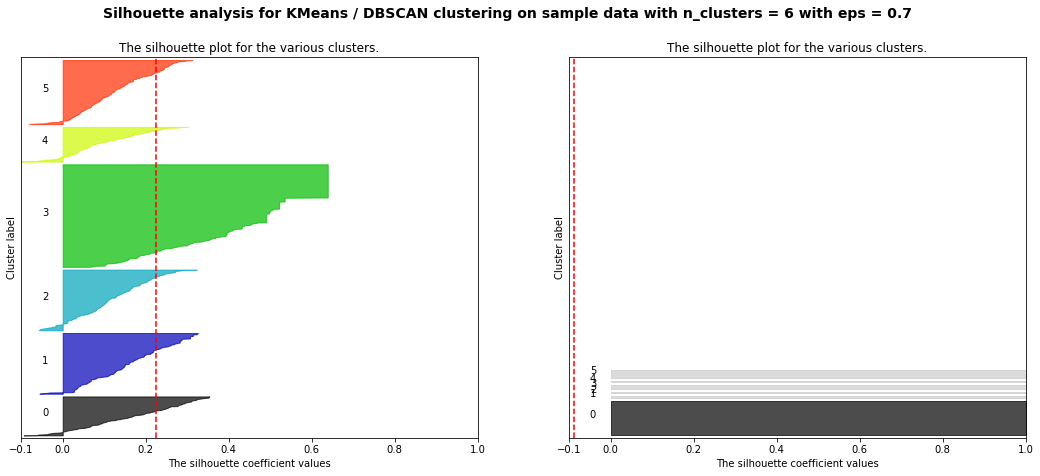

For n_clusters = 7 The average silhouette_score is : 0.22869835964733376
For eps = 0.9 The average silhouette_score is : -0.08847612852364398


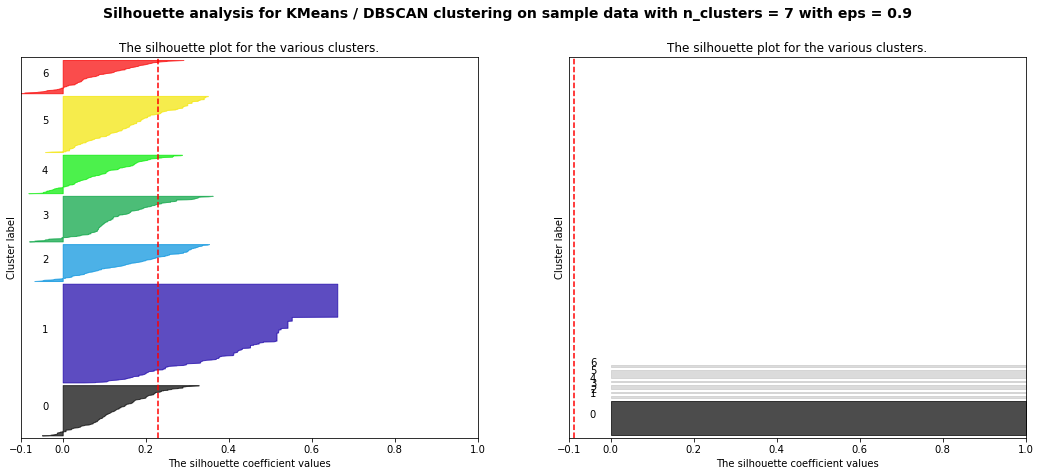

In [38]:
plot_silhouette(df_x, [2,3,4,5,6,7], [0.1, 0.3, 0.5, 0.6 ,0.7, 0.9], [1])

In [39]:
df_x

,관공서_수,은행_수,종합병원_수,일반_병원_수,약국_수,대학교_수,백화점_수,슈퍼마켓_수,극장_수,숙박_시설_수,공항_수,철도_역_수,버스_터미널_수,지하철_역_수,버스_정거장_수
0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,2
1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,2
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2,3,0,0,1,0,0,0,0,0,0,0,0,0,3
4,0,3,0,0,2,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1461,2,1,0,1,3,0,0,1,0,1,0,0,0,1,3
1462,2,2,0,0,3,0,0,1,0,0,0,0,0,1,3
1463,2,2,0,0,2,0,0,1,0,0,0,0,0,1,2
1464,2,1,0,0,3,0,0,1,0,0,0,0,0,1,3


In [40]:
df['관공서_은행'] = df['관공서_수'] + df['은행_수']
df['의료'] = df['종합병원_수'] + df['일반_병원_수'] + df['약국_수']
df['쇼핑'] = df['백화점_수'] + df['슈퍼마켓_수']
df['여가'] = df['극장_수'] + df['숙박_시설_수']
df['교통'] = df['공항_수'] + df['철도_역_수'] + df['버스_터미널_수'] + df['지하철_역_수'] + df['버스_정거장_수']
df

,Unnamed: 0,상권_코드_명,관공서_수,은행_수,종합병원_수,일반_병원_수,약국_수,대학교_수,백화점_수,슈퍼마켓_수,...,공항_수,철도_역_수,버스_터미널_수,지하철_역_수,버스_정거장_수,관공서_은행,의료,쇼핑,여가,교통
0,0,개포로82길,0,1,0,0,1,0,0,0,...,0,0,0,1,2,1,1,0,0,3
1,1,선릉로18길,1,0,0,0,1,0,0,0,...,0,0,0,0,2,1,1,0,0,2
2,2,강남개포시장,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,개포로17길,2,3,0,0,1,0,0,0,...,0,0,0,0,3,5,1,0,0,3
4,4,개포로20길,0,3,0,0,2,0,0,0,...,0,0,0,0,3,3,2,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1461,1461,동일로123길,2,1,0,1,3,0,0,1,...,0,0,0,1,3,3,4,1,1,4
1462,1462,동일로139가길,2,2,0,0,3,0,0,1,...,0,0,0,1,3,4,3,1,0,4
1463,1463,동일로139길,2,2,0,0,2,0,0,1,...,0,0,0,1,2,4,2,1,0,3
1464,1464,봉화산로4길,2,1,0,0,3,0,0,1,...,0,0,0,1,3,3,3,1,0,4


In [41]:
df.columns

Index(['Unnamed: 0', '상권_코드_명', '관공서_수', '은행_수', '종합병원_수', '일반_병원_수', '약국_수',
       '대학교_수', '백화점_수', '슈퍼마켓_수', '극장_수', '숙박_시설_수', '공항_수', '철도_역_수',
       '버스_터미널_수', '지하철_역_수', '버스_정거장_수', '관공서_은행', '의료', '쇼핑', '여가', '교통'],
      dtype='object')

In [42]:
df_x2 = df.drop(['Unnamed: 0', '상권_코드_명', '관공서_수', '은행_수', '종합병원_수', '일반_병원_수', '약국_수',
       '대학교_수', '백화점_수', '슈퍼마켓_수', '극장_수', '숙박_시설_수', '공항_수', '철도_역_수',
       '버스_터미널_수', '지하철_역_수', '버스_정거장_수',], axis=1)
df_x2

,관공서_은행,의료,쇼핑,여가,교통
0,1,1,0,0,3
1,1,1,0,0,2
2,0,0,0,0,0
3,5,1,0,0,3
4,3,2,0,0,3
...,...,...,...,...,...
1461,3,4,1,1,4
1462,4,3,1,0,4
1463,4,2,1,0,3
1464,3,3,1,0,4


For n_clusters = 2 The average silhouette_score is : 0.38716921080347894
For eps = 0.1 The average silhouette_score is : 0.6568527809286341


ValueError: operands could not be broadcast together with shapes (0,) (17,) 

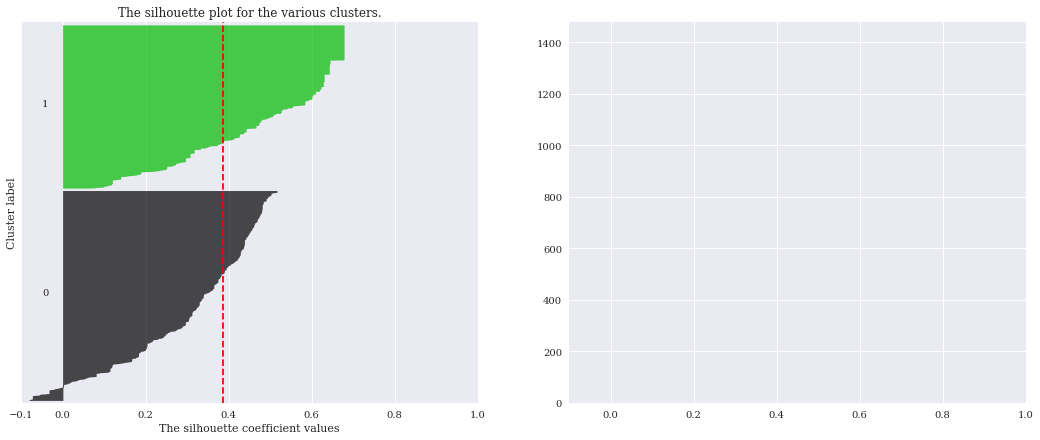

In [87]:
plot_silhouette(df_x2, [2,3,4,5,6,7], [0.1, 0.3, 0.5, 0.6 ,0.7, 0.9], [2,5,10,5,2,10])

In [47]:
kmeans2 = KMeans(n_clusters=3, max_iter=500)

cluster2 = kmeans2.fit_transform(df_x2)
centers_df2 = kmeans2.cluster_centers_

display(centers_df2, kmeans2.labels_)

array([[3.96414343, 3.51394422, 0.4063745 , 0.65537849, 2.76693227],
       [0.40855107, 0.42755344, 0.17814727, 0.14014252, 0.27315914],
       [1.83793738, 2.10865562, 0.22651934, 0.29281768, 2.28913444]])

array([2, 2, 1, ..., 0, 0, 1])

In [78]:
dbscan2 = DBSCAN(eps=0.9, min_samples=3)

dbscan2_data = dbscan.fit_predict(df_x)
dbscan2_data

array([  0,   1,   2, ..., 949, 950,   2], dtype=int64)

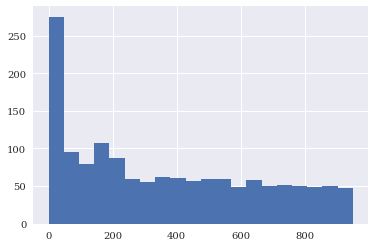

In [79]:
plt.hist(dbscan2_data, bins=20)

plt.show()

In [80]:
score3 = silhouette_score(df_x2, kmeans2.labels_)
score4 = silhouette_score(df_x2, dbscan2_data)
display(score3, score4)
samples3 = silhouette_samples(df_x2, kmeans2.labels_)
samples4 = silhouette_samples(df_x2, dbscan2_data)
display(samples3, samples4)

0.29695902565067506

0.05184174624829468

array([ 0.24852166, -0.00087556,  0.72645484, ...,  0.08329846,
        0.06199766,  0.72645484])

array([0., 0., 0., ..., 0., 0., 0.])